## Generating location data per specific City
This python file is for generating location data set for each city.

### 1.Import package

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd 
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
import numpy as np
import re

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

fig_w = 13 #Graph width
fig_h = 9 #Graph height

/var/folders/y4/8c2st9g91x584wgy6q2j063h0000gn/T/ipykernel_7467/1013157658.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### 2. Read whole dataset
Kaggle dataset is '[US_Accidents_March23.csv](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/data)'. Read from csv file to dataframe.
Extract specific columns from original dataset.
<ol>
    <li><strong>ID</strong> for data tuple</li>
    <li><strong>Severity</strong> for Car accident level</li>
    <li><strong>Start_Time</strong> is accident occur time</li>
    <li><strong>Start_Lat</strong> is latitude cooridnation of accident location</li>
    <li><strong>Start_Lng</strong> is logitude cooridnation of accident location</li>
    <li><strong>City</strong> is city name of accident occured</li>
    <li><strong>County</strong> is county name of accident occured</li>
</ol>

In [2]:
df = pd.read_csv('US_Accidents_March23.csv')
orderdf = df[['ID','Severity','Start_Time','Start_Lat','Start_Lng','City','County']]

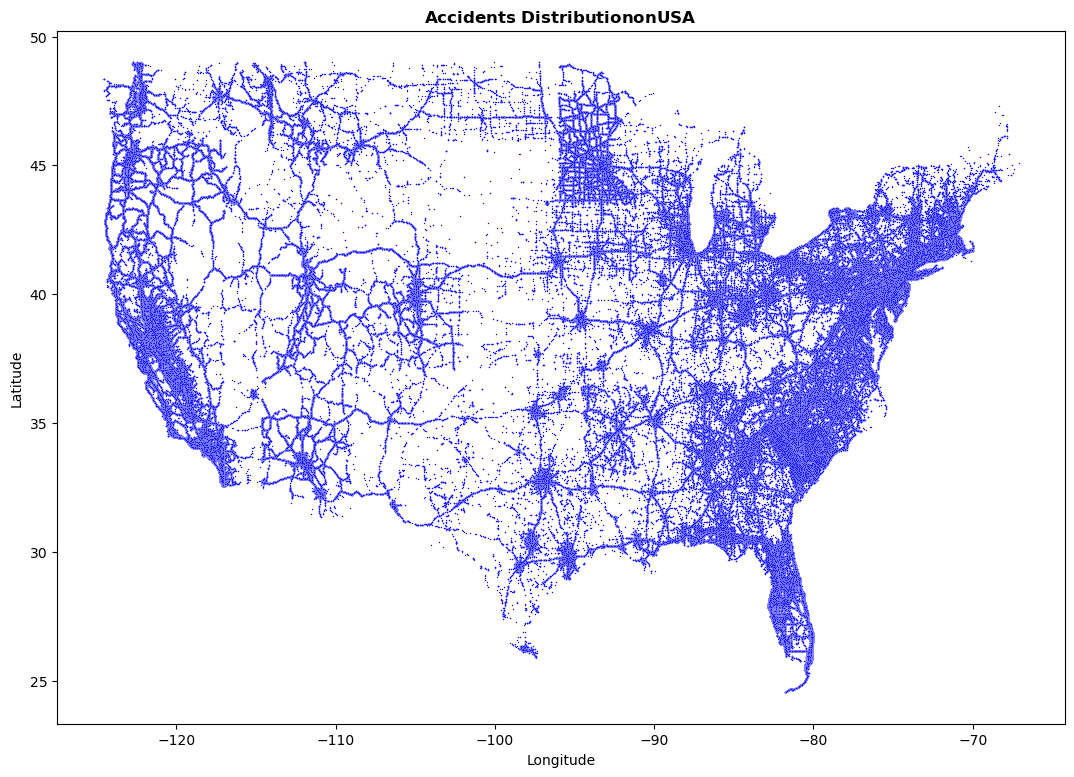

In [3]:
plt.figure(figsize=(fig_w, fig_h))
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat, s=1, color='blue')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(r'$\mathrm{\mathbf{Accidents\ Distribution on USA}}$')

plt.show()

### 3. Define function for data extract and saving
This function data extract and saving with input condition(***col_name*** == ***name***) in ***origin_df***.

In [4]:
def save_partial_city(origin_df, col_name, name):
    original_file = 'US_Accidents_March23_Partial_%s.csv' % (name)
    df_partial = origin_df[origin_df[col_name]==name]
    df_partial.to_csv(original_file)
    
    df_hs = pd.read_csv(original_file)
    fig_w = 13
    fig_h = 9
    # Create a location scatter plot using Seaborn
    plt.figure(figsize=(fig_w, fig_h))
    sns.scatterplot(x=df_hs.Start_Lng, y=df_hs.Start_Lat, s=1, color='blue')

    #plt.scatter(x=df_hs.Start_Lng, y=df_hs.Start_Lat, color='blue', s=0.5)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(r'$\mathrm{\mathbf{Accidents\ Distribution\ on\ %s}}$' % (name.replace(' ', '\ ')))

    plt.show()

#### 3.1 Define function for data extract and saving under range condition
If location data spread widly indeed some location looking like outliner, extract location data without that using range condition

In [5]:
def save_partial_range_city(origin_df, col_name, name, lat_s, lat_e, long_s, long_e):
    original_file = 'US_Accidents_March23_Partial_Range_%s.csv' % (name)
    df_partial = origin_df[origin_df[col_name]==name]
    df_partial = df_partial[df_partial['Start_Lat'] >= lat_s]
    df_partial = df_partial[df_partial['Start_Lat'] <= lat_e]
    df_partial = df_partial[df_partial['Start_Lng'] >= long_s]
    df_partial = df_partial[df_partial['Start_Lng'] <= long_e]
    
    df_partial.to_csv(original_file)
    
    df_hs = pd.read_csv(original_file)
    fig_w = 13
    fig_h = 9
    # Create a location scatter plot using Seaborn
    plt.figure(figsize=(fig_w, fig_h))
    sns.scatterplot(x=df_hs.Start_Lng, y=df_hs.Start_Lat, s=1, color='blue')

    #plt.scatter(x=df_hs.Start_Lng, y=df_hs.Start_Lat, color='blue', s=0.5)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(r'$\mathrm{\mathbf{Accidents\ Distribution\ on\ %s}}$' % (name.replace(' ', '\ ')))

    plt.show()

### 4. EDA 
Looking highest geolocation include city. Looking around with visualization manner and text list.

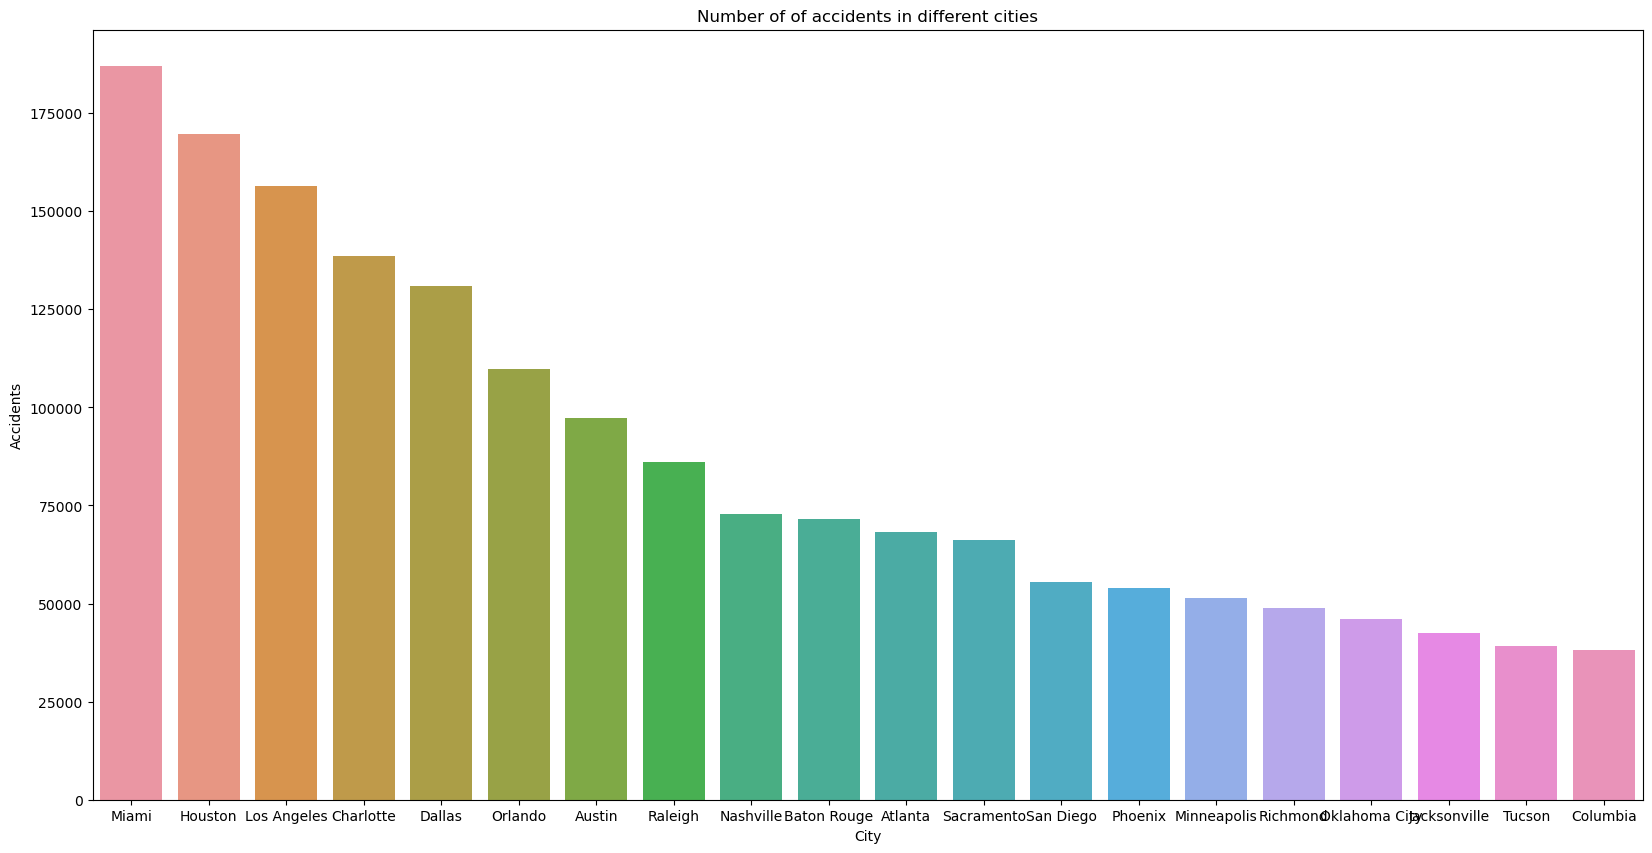

In [6]:
df5 = orderdf.groupby(['City'])['City'].count().sort_values(ascending=False)
#select top 10 
df_first_20 = df5.iloc[:20]

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=df_first_20.index, y=df_first_20)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different cities")

plt.show()

In [7]:
frequent_values = orderdf['City'].value_counts().head(30)

print(frequent_values)

Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
San Antonio       37961
Greenville        37802
Saint Paul        37383
Seattle           36564
Portland          35399
San Jose          34536
Indianapolis      33219
Chicago           32035
Tampa             31193
Denver            30557
Name: City, dtype: int64


### 5. Checking City data distribution
Call function for extract geolocation data for city that input with parameter. It extract city data and show in distribution graph.

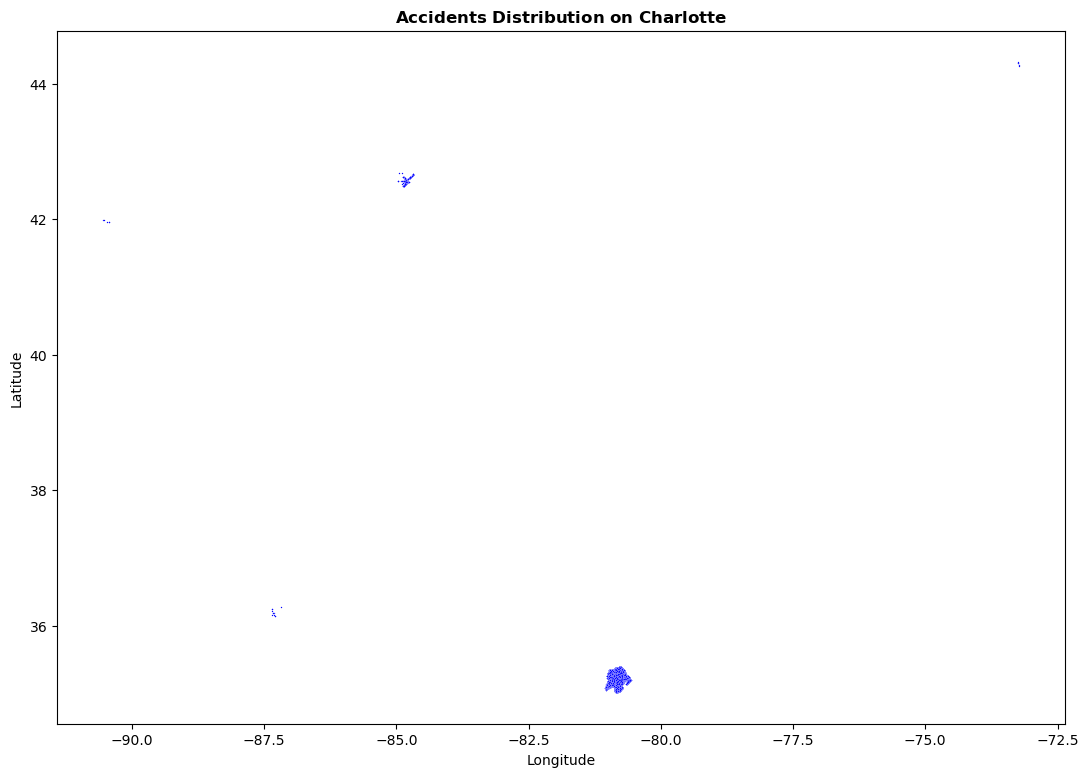

In [8]:
save_partial_city(orderdf, 'City', 'Charlotte')

#### 5.1 Checking City data distribution with range condition
If is there outlier data, adjusting data spread range in interested area

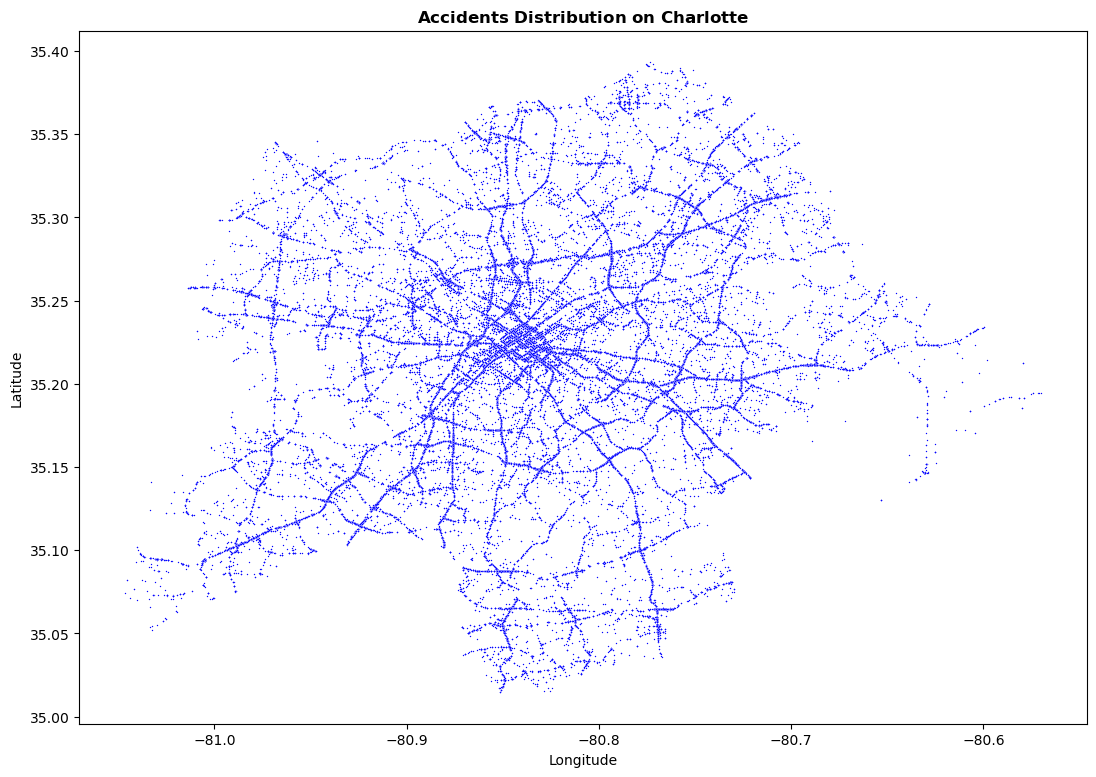

In [9]:
save_partial_range_city(orderdf, 'City', 'Charlotte', 34, 36, -82, -80)

### Generating city data set for optimal condition
After repeating 5th steps serveral time, fixing range or without range 'call syntax'. If we don't need to extract new data, simply use this step

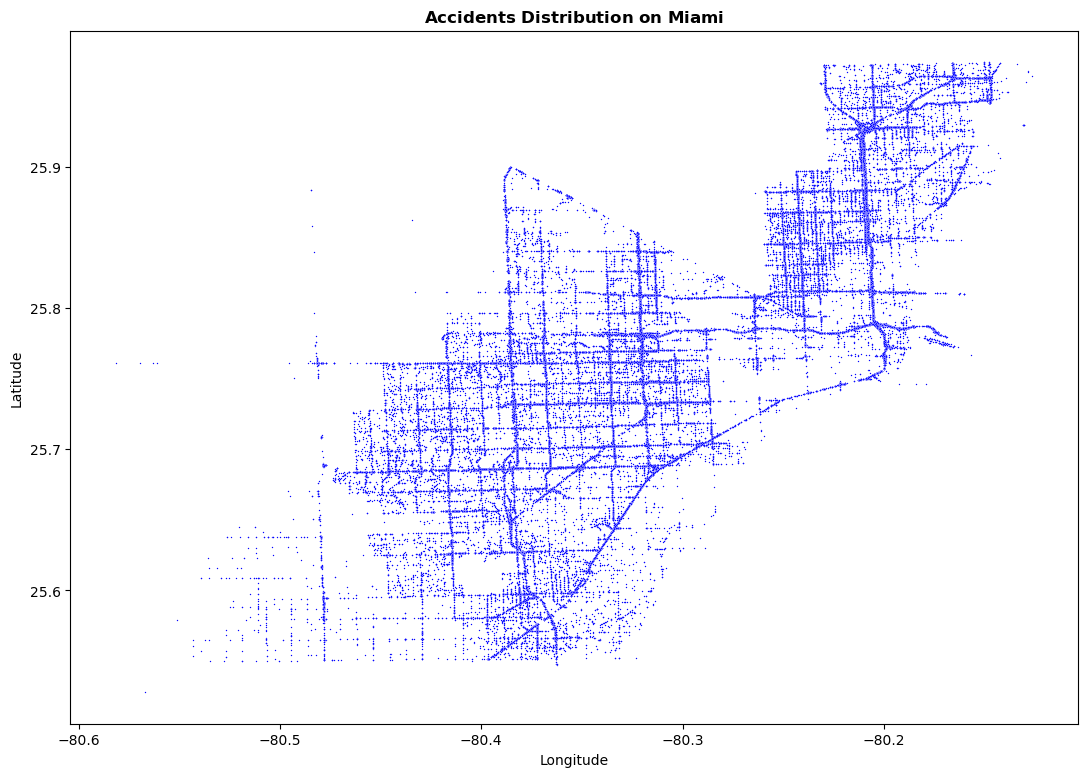

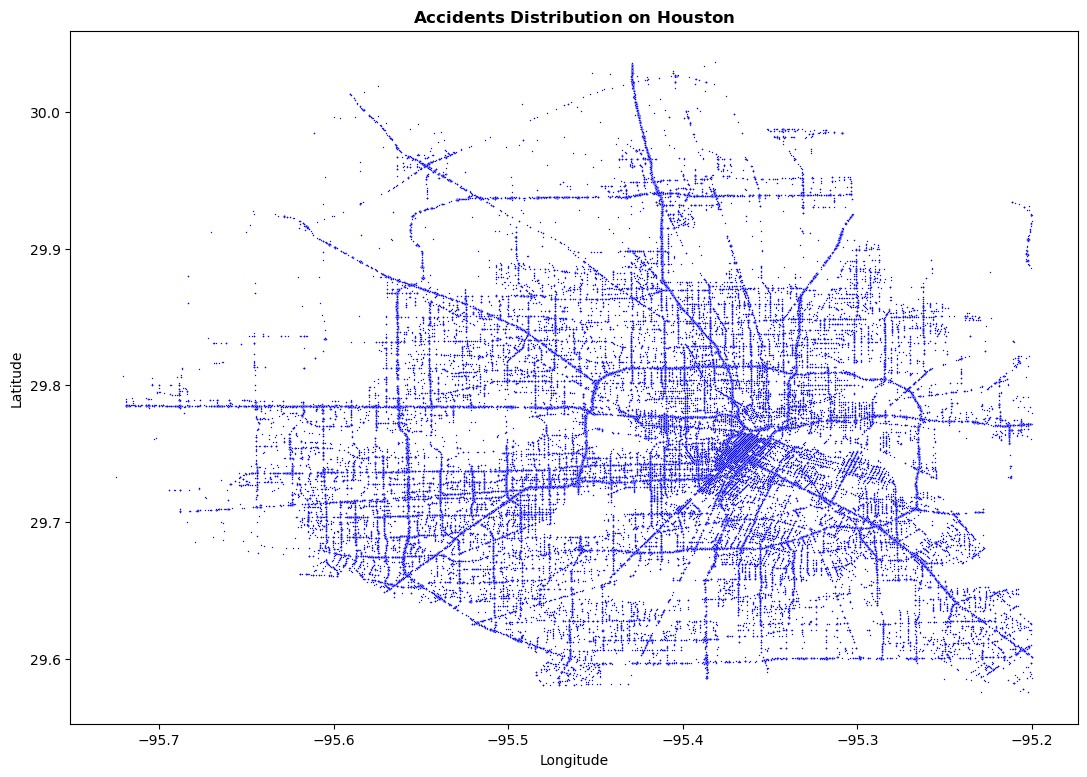

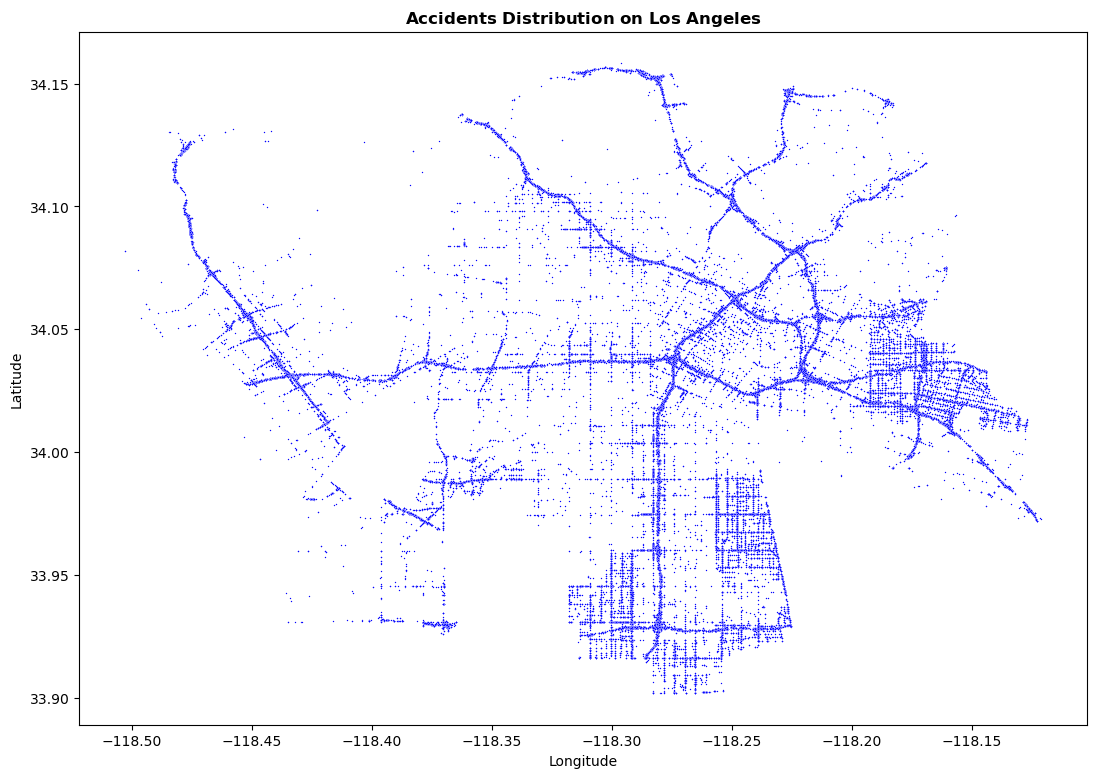

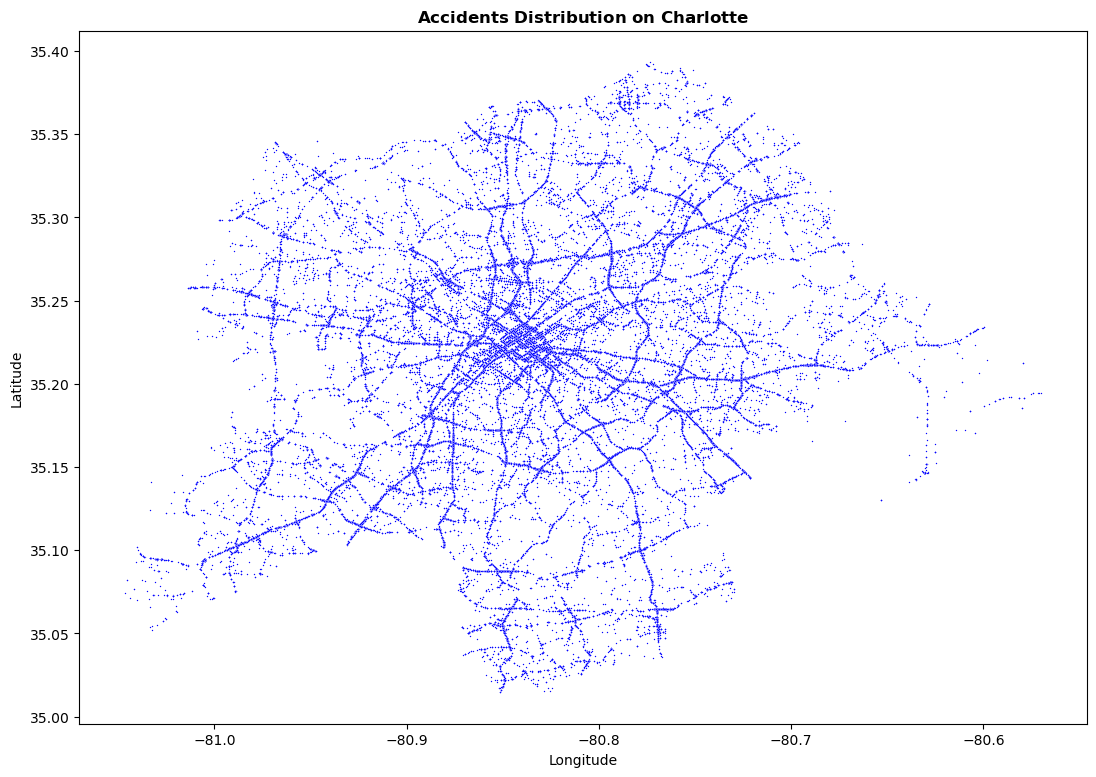

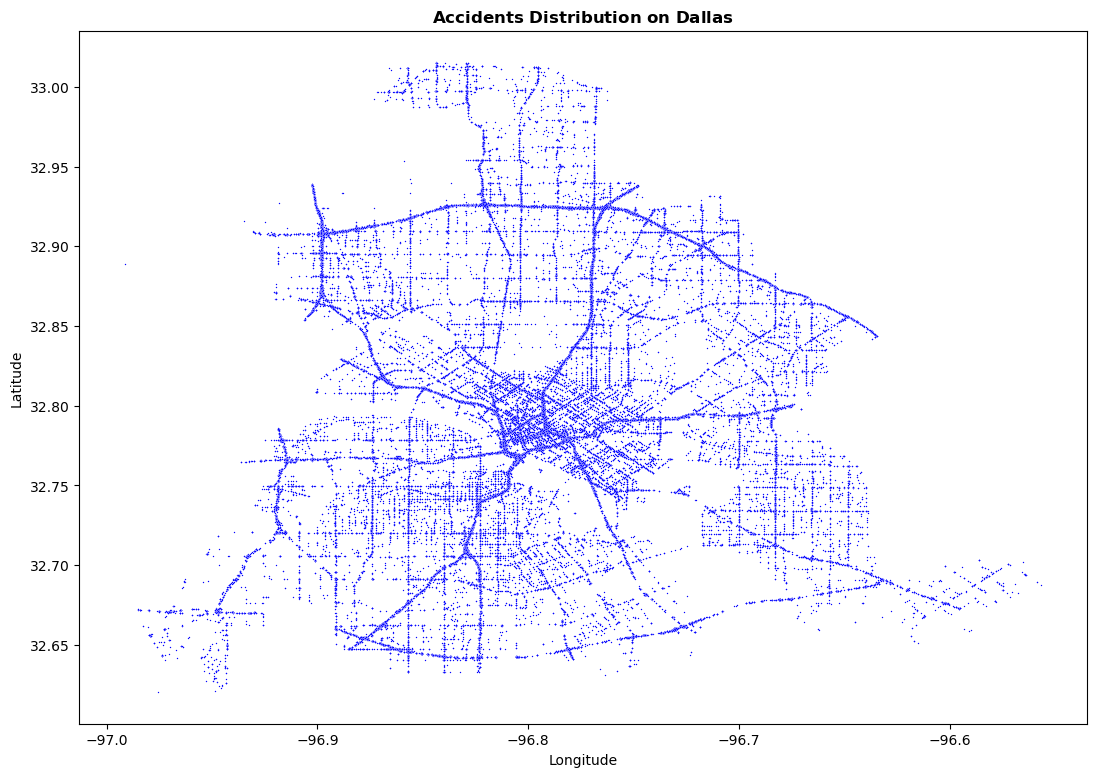

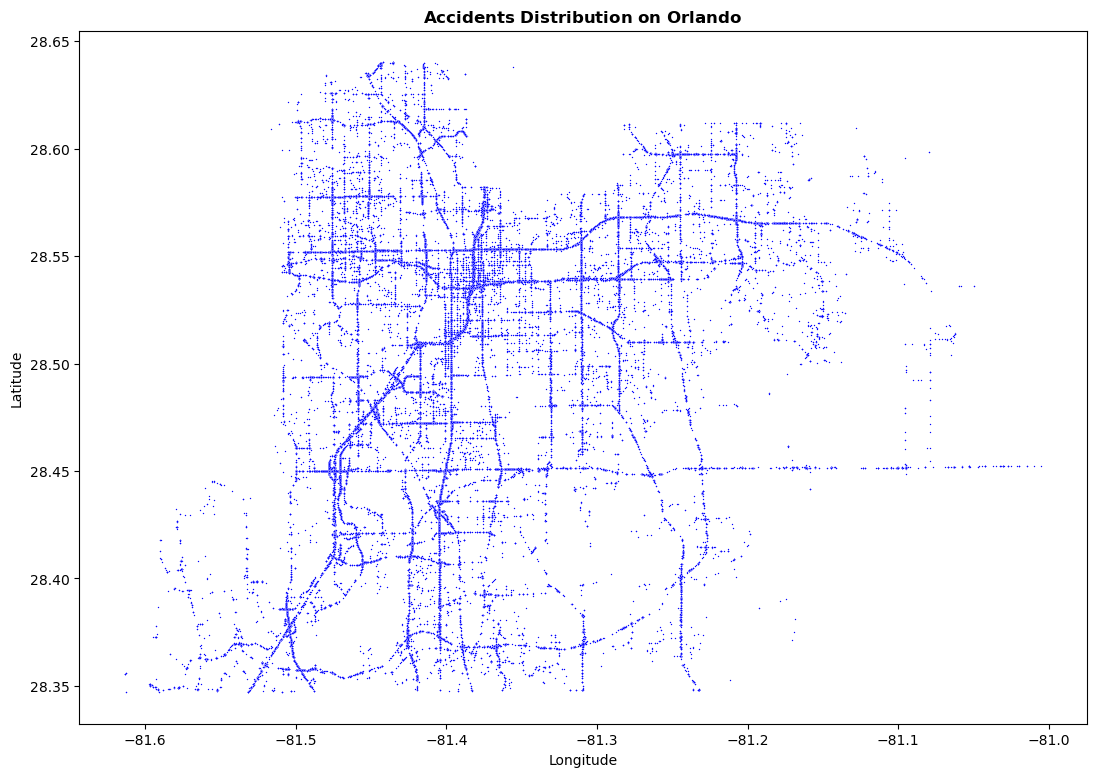

In [12]:
save_partial_range_city(orderdf, 'City', 'Miami', 20, 50, -80.6, -78)
save_partial_range_city(orderdf, 'City', 'Houston', 27, 31, -98, -95.2)
save_partial_city(orderdf, 'City', 'Los Angeles')
save_partial_range_city(orderdf, 'City', 'Charlotte', 34, 36, -82, -80)
save_partial_range_city(orderdf, 'City', 'Dallas', 32, 35, -97, -95)
save_partial_range_city(orderdf, 'City', 'Orlando', 28, 29, -82, -81)